<div style="text-align: center;">
  <h2>Stage 1: Data Preparation and Initial Exploration</h2>
</div>

### **Import libraries and packages, define functions**

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.ticker import FuncFormatter

The function below allows us to format to format the values adding an 'M' that stands for millions or 'T' for thousands, for better visibility.

In [68]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

### **1. Load and import the two datase**

In [69]:
population_df = pd.read_csv('PEA11.20231013T111046.csv')
migration_df = pd.read_csv('PEA18.20231016T141007.csv')

### **2.	Examine the structure and shape of the datasets**

#### Get the size of the dataset

In [70]:
population_dataset_size = population_df.size
migration_dataset_size = migration_df.size

In [71]:
print("There are", population_dataset_size, "values in total across the whole population dataset")
print("There are", migration_dataset_size, "values in total across the whole migration dataset")

There are 118170 values in total across the whole population dataset
There are 31968 values in total across the whole migration dataset


#### Get the shape of the datasets

In [72]:
pop_rows, pop_columns = population_df.shape
mig_rows, mig_columns = migration_df.shape

print(f"For the population dataset the Number of rows is {pop_rows}, the Number of columns is {pop_columns}")
print(f"For the migration dataset the Number of rows is {mig_rows}, the Number of columns is {mig_columns}")

For the population dataset the Number of rows is 11817, the Number of columns is 10
For the migration dataset the Number of rows is 2664, the Number of columns is 12


#### Sample data

Displaying the first few rows of the data, to get a sense of what the data looks like

In [73]:
print("Population dataset")
population_df.head(7)

Population dataset


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876


In [74]:
print("Imigration dataset")
migration_df.head(7)

Imigration dataset


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


#### Data types and info

In [75]:
print(f"Population dataset info:")
print()
population_df.info()

Population dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


In [76]:
print("Migrration dataset info:")
print()
migration_df.info()

Migrration dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


#### Column names

In [77]:
population_column_names = population_df.columns
migration_column_names = migration_df.columns

In [78]:
print("Population dataset column names:", list(population_column_names))
print()
print("Migration dataset column names:", list(migration_column_names))

Population dataset column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C02076V03371', 'Single Year of Age', 'C02199V02655', 'Sex', 'UNIT', 'VALUE']

Migration dataset column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C02719V03286', 'Country', 'C02199V02655', 'Sex', 'C02542V03077', 'Origin or Destination', 'UNIT', 'VALUE']


#### Descriptive statistics

Obtaining descriptive statistics for numerical columns, including count, mean, standard deviation, minimum, and maximum

In [79]:
population_summary = population_df.describe()
migration_summary = migration_df.describe()

In [80]:
population_summary

,TLIST(A1),Year,VALUE
count,11817.000000,11817.000000,1.181700e+04
mean,1996.410256,1996.410256,5.352461e+04
std,24.463165,24.463165,2.867754e+05
min,1926.000000,1926.000000,6.000000e+00
25%,1986.000000,1986.000000,1.242700e+04
50%,2004.000000,2004.000000,2.667500e+04
75%,2014.000000,2014.000000,3.557700e+04
max,2023.000000,2023.000000,5.281612e+06


In [81]:
migration_summary

,TLIST(A1),Year,C02542V03077,VALUE
count,2664.000000,2664.000000,2664.000000,2104.000000
mean,2005.000000,2005.000000,3.333333,8.943726
std,10.679083,10.679083,1.699992,15.513703
min,1987.000000,1987.000000,1.000000,-43.900000
25%,1996.000000,1996.000000,1.000000,1.800000
50%,2005.000000,2005.000000,4.000000,4.700000
75%,2014.000000,2014.000000,5.000000,10.200000
max,2023.000000,2023.000000,5.000000,151.100000


#### Check for Duplicates

In [87]:
population_duplicates = population_df.duplicated().sum()
print(f"Number of duplicate rows in the migration dataset is {population_duplicates}")


Number of duplicate rows in the migration dataset is 0


In [88]:
migration_duplicates = migration_df.duplicated().sum()
print(f"Number of duplicate rows in the migration dataset is {migration_duplicates}")

Number of duplicate rows in the migration dataset is 0


### **3.	Perform basic data cleaning and data type conversion.**

#### Handling Missing Values

Another important step is to check if we have some missing values within the dataset. This can be done in various ways. First, I am using the .isna() function which returns a DataFrame which return a boolean - True if the corresponding element in the original DataFrame is missing (NaN), and False otherwise. However, an easy way to see the sum of all NaN values for each column is to use the .sum() function. In the following dataset we can confirm that we do not have any NaN values. 

In [89]:
population_missing_data = population_df.isna()
population_missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11812,False,False,False,False,False,False,False,False,False,False
11813,False,False,False,False,False,False,False,False,False,False
11814,False,False,False,False,False,False,False,False,False,False
11815,False,False,False,False,False,False,False,False,False,False


In [90]:
migration_missing_data = migration_df.isna()
migration_missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,False,False,False,False,False,False,False,False,False,False,False,False
2660,False,False,False,False,False,False,False,False,False,False,False,False
2661,False,False,False,False,False,False,False,False,False,False,False,False
2662,False,False,False,False,False,False,False,False,False,False,False,False


Using heatmap to visualize if there are missing values.

In [91]:
population_missing_values = population_df.isnull().sum()
population_missing_values

STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

<Axes: >

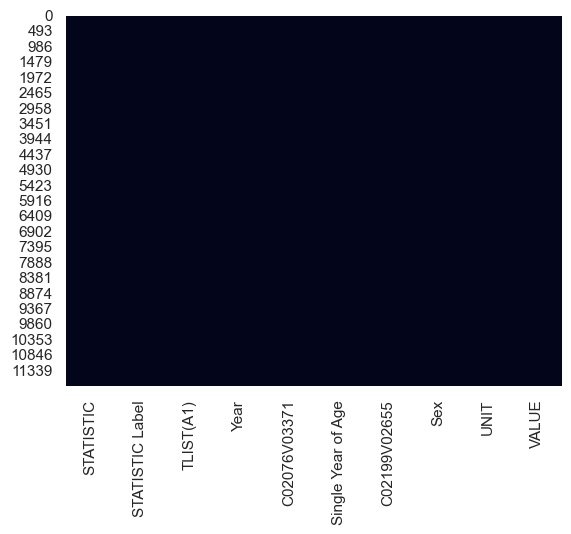

In [92]:
sns.heatmap(population_df.isnull(), cbar=False)

In [93]:
migration_missing_values = migration_df.isnull().sum()
migration_missing_values

STATISTIC                  0
STATISTIC Label            0
TLIST(A1)                  0
Year                       0
C02719V03286               0
Country                    0
C02199V02655               0
Sex                        0
C02542V03077               0
Origin or Destination      0
UNIT                       0
VALUE                    560
dtype: int64

Usind heatmap to visualize the missing values.

<Axes: >

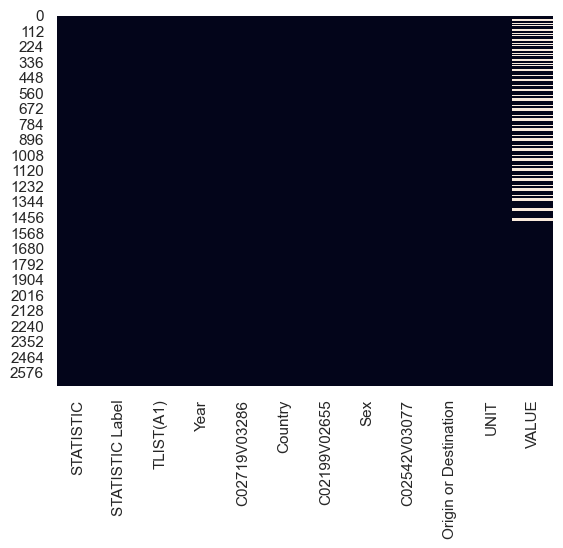

In [94]:
sns.heatmap(migration_df.isnull(), cbar=False)

#### Dealing with Outliers

Outliers can impact statistical analysis. Detecting and dealing with outliers using method z-scores.

Detecting outliers using z-scores (greater than 3 or less than -3) is a common method in statistics. Z-scores, also known as standard scores, measure how far a data point is from the mean in terms of standard deviations. In a standard normal distribution (mean = 0, standard deviation = 1), approximately 99.7% of the data falls within 3 standard deviations from the mean. This implies that data outside this range can be considered unusual or extreme. 

In [95]:
population_z_scores = stats.zscore(population_df['VALUE'])
population_outliers = (population_z_scores > 3) | (population_z_scores < -3)
population_outlier_count = population_outliers.sum()
print("Number of outliers:", population_outlier_count)
population_outliers

Number of outliers: 117


0         True
1         True
2         True
3        False
4        False
         ...  
11812    False
11813    False
11814    False
11815    False
11816    False
Name: VALUE, Length: 11817, dtype: bool

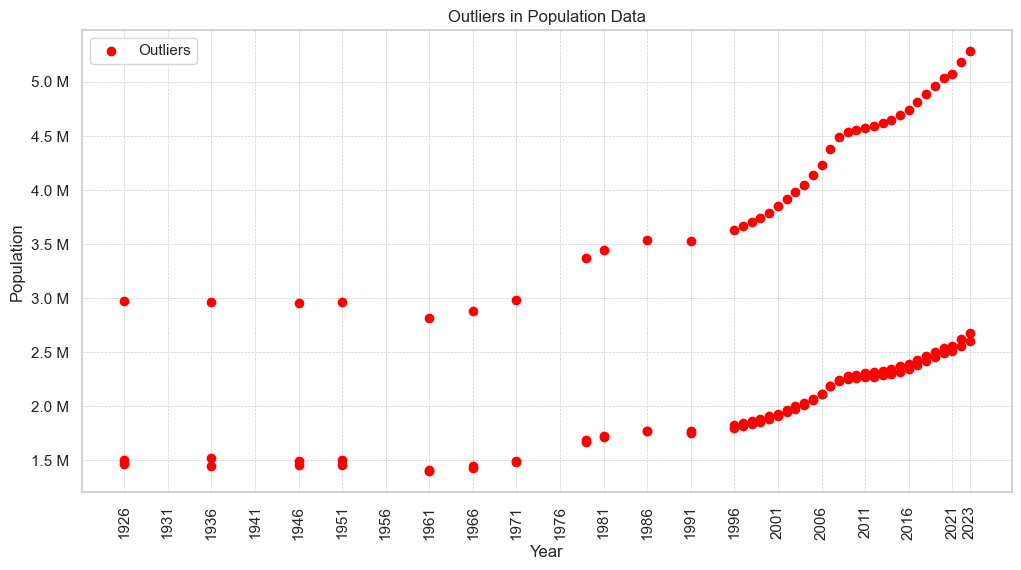

In [101]:
population_outlier_df = population_df[population_outliers]

years = population_outlier_df['Year'].unique()
popul_first_year = years.min()
populat_last_year = years.max()
tick_interval = 5
xtick_positions = [popul_first_year, populat_last_year] + list(range(popul_first_year + tick_interval, populat_last_year, tick_interval))
xtick_labels = [str(year) for year in xtick_positions]

plt.figure(figsize=(12, 6))
plt.scatter(population_outlier_df['Year'], population_outlier_df['VALUE'], color='red', label='Outliers')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Outliers in Population Data')

plt.xticks(xtick_positions, xtick_labels, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.legend()
plt.show()


In [97]:
migration_z_dcores = stats.zscore(migration_df['VALUE'])
migration_outliers = (migration_z_dcores > 3) | (migration_z_dcores < -3)
migration_outlier_count = migration_outliers.sum()
print("Number of outliers:", migration_outlier_count)
migration_outliers

Number of outliers: 0


0       False
1       False
2       False
3       False
4       False
        ...  
2659    False
2660    False
2661    False
2662    False
2663    False
Name: VALUE, Length: 2664, dtype: bool

#### Dealing with Outliers 2

In [104]:
# Calculate Q1, Q3 and IQR for the VALUE column
Q1 = population_df['VALUE'].quantile(0.25)
Q3 = population_df['VALUE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = population_df[(population_df['VALUE'] < lower_bound) | (population_df['VALUE'] > upper_bound)]

# Statistics about the outliers
outliers_stats = {
    'Total number of outliers': outliers.shape[0],
    'Percentage of outliers': (outliers.shape[0] / population_df.shape[0]) * 100,
    'Minimum outlier value': outliers['VALUE'].min(),
    'Maximum outlier value': outliers['VALUE'].max(),
    'IQR': IQR,
    'Lower bound for outliers': lower_bound,
    'Upper bound for outliers': upper_bound
}

outliers_stats


{'Total number of outliers': 463,
 'Percentage of outliers': 3.9180841161039184,
 'Minimum outlier value': 70321,
 'Maximum outlier value': 5281612,
 'IQR': 23150.0,
 'Lower bound for outliers': -22298.0,
 'Upper bound for outliers': 70302.0}